In [248]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import pandas as pd
import numpy as np
from sklearn import metrics

In [249]:
data_label = pd.read_csv('train/train.csv')
print(data_label.shape)
print(data_label.head())

(5435, 2)
   ID         Class
0   0         siren
1   1  street_music
2   2      drilling
3   3         siren
4   4      dog_bark


In [250]:
path_list_all = []
path_class_list = []
for ID in data_label:
    path = 'train/Train/'+data_label.ID.astype(str)+'.wav'
    path_class = data_label.Class
    path_list_all.append(path)
    path_class_list.append(path_class)

In [251]:
path_list_all_1 = []
path_class_list_2 = []
for i in range(5435):
    path_list_all_1.append(path_list_all[0][i])
    path_class_list_2.append(path_class_list[0][i])

In [252]:
path_df = pd.DataFrame(list(zip(path_list_all_1,path_class_list_2)),columns=['path','label'])

In [253]:
path_df.head()

,path,label
0,train/Train/0.wav,siren
1,train/Train/1.wav,street_music
2,train/Train/2.wav,drilling
3,train/Train/3.wav,siren
4,train/Train/4.wav,dog_bark


In [254]:
#data_label.Class.value_counts()

In [255]:
# import random
# i=random.choice(data_label.index)
# audio_name_id = data_label.ID[i]
# audio_name = data_label.Class[i]
# print(audio_name)
# path = 'train/Train/'+audio_name_id.astype(str)+'.wav'
# x, sr = librosa.load(path)
# plt.figure(figsize=(12, 4))
# librosa.display.waveplot(x, sr=sr)
# print(path)

In [256]:
def cal_mfcc(path):
    X,sample_rate = librosa.load(path,res_type = 'kaiser_fast')
    mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    feature = mfcc
    return feature

In [257]:
def cal_zcr(path):
    X,sample_rate = librosa.load(path,res_type='kaiser_fast')
    zcr = np.mean(librosa.feature.zero_crossing_rate(X,frame_length=2048,hop_length=512,center=True))
    return zcr

In [258]:
def cal_sc(path):
        X,sample_rate = librosa.load(path,res_type='kaiser_fast')
        sc = (librosa.feature.spectral_centroid(X,sr=sample_rate,n_fft=2048,
                                                       hop_length=512,freq=None,win_length=None,window='hann',
                                                       center=True,pad_mode='reflect'))
        return sc

In [259]:
def cal_rms(path):
    X,sample_rate = librosa.load(path,res_type='kaiser_fast')
    rms = np.mean(librosa.feature.rms(y=X,frame_length=2048,hop_length=512,center=True,pad_mode='reflect'))
    return rms

In [260]:
def cal_melspectrogram(path):
    X,sample_rate = librosa.load(path,res_type='kaiser_fast')
    _melspectrogram = np.mean(librosa.feature.melspectrogram(y=X,sr=sample_rate,n_fft=2048,hop_length=512,
                                                             win_length=None,window='hann',center=True, 
                                                             pad_mode='reflect',power=2.0))
    return _melspectrogram

In [261]:
path_df['rms'] = path_df['path'].apply(cal_rms)

In [262]:
path_df['mfcc'] = path_df['path'].apply(cal_mfcc)

In [263]:
path_df['melspectrogram'] = path_df['path'].apply(cal_melspectrogram)

In [264]:
path_df['zcr'] = path_df['path'].apply(cal_zcr)

In [265]:
path_df['sc'] = path_df['path'].apply(cal_sc)

In [266]:
path_df['mfcc'][1]

array([-15.744001  , 124.11996   , -29.42888   ,  39.44719   ,
       -23.501917  ,  16.550812  , -21.736814  ,  16.533567  ,
       -16.971731  ,   4.483585  , -17.387693  ,   0.737122  ,
       -16.289228  ,   5.112149  , -10.559228  ,   2.9178734 ,
       -10.390847  ,   0.65130013, -10.046339  ,  -1.7834797 ,
        -6.099714  ,   5.6297855 ,  -4.6511116 ,  -1.3691933 ,
        -8.249165  ,  -2.361927  ,  -4.796207  ,  -0.5025695 ,
        -5.410676  ,   2.078045  ,   7.1860027 ,   8.18575   ,
         0.7673603 ,   0.32726124,  -2.2136655 ,  -3.1068382 ,
        -5.7238464 ,   0.8237056 ,   1.7193222 ,  -0.33146355],
      dtype=float32)

In [267]:
path_df['mfcc'] = path_df['mfcc'].apply(pd.to_numeric)

In [268]:
path_df.head()       

,path,label,rms,mfcc,melspectrogram,zcr,sc
0,train/Train/0.wav,siren,0.107979,"[-82.12359, 139.50595, -42.430847, 24.82786, -...",2.618728,0.085286,"[[1721.7573842070665, 1756.5329224582442, 1776..."
1,train/Train/1.wav,street_music,0.227405,"[-15.744001, 124.11996, -29.42888, 39.44719, -...",11.364860,0.091678,"[[1944.4446714720325, 1754.38639470224, 1490.6..."
2,train/Train/2.wav,drilling,0.067240,"[-123.393654, 15.181944, -50.093338, 7.141871,...",0.606284,0.314608,"[[2637.5527198212058, 2363.7869031161554, 2322..."
3,train/Train/3.wav,siren,0.184036,"[-213.2787, 89.323616, -55.256165, 12.632097, ...",7.957627,0.107778,"[[2408.419503752015, 2502.4956303337826, 2464...."
4,train/Train/4.wav,dog_bark,0.150679,"[-237.9265, 135.90247, 39.26844, 21.24023, 9.5...",9.616514,0.025309,"[[1576.293899393653, 1567.6104449351628, 1879...."


In [269]:
def check_sc(sc):
    print("Hello")
    print(path_df.sc)
    for p in sc:
        co = (p.shape)
        if co ==(1,173):
            return sc
        else:
            break

In [270]:
# path_df['sc'] = path_df['sc'].T.ravel()
# sc = path_df['sc']
# #path_df[ sc== for p in sc: if p.shape==(1,173)]
# path_df['sc'] = path_df['sc'].apply(check_sc)
# # for p in sc:
# #     print(p.shape)
# path_df.head()

In [271]:
#column_train = ['mfcc','zcr']

In [272]:
X = path_df['mfcc']
y = path_df['label']
#y.shape
#X_1 = X.reshape(-1,1)


In [273]:
P = np.copy(X)
#P.shape
#for p in P:
#    print(p.shape)
print(y.shape)
#path_df.label

(5435,)


In [274]:
P[0].T.ravel().shape
count = 0 
for p in P:
    co = (p.shape)
    if co !=(40,):
        count = count+1
    #if co ==(173,):
     #   count = count+1
print(count)
    #print(count(p.shape)!=((173,) or (1,173))) 

0


In [275]:
P_list = [p for p in P]

In [276]:
X = np.array(P_list)

In [277]:
print(X)

[[-8.21235886e+01  1.39505951e+02 -4.24308472e+01 ... -5.02371252e-01
  -2.60428572e+00 -1.05346370e+00]
 [-1.57440014e+01  1.24119957e+02 -2.94288807e+01 ...  8.23705614e-01
   1.71932220e+00 -3.31463546e-01]
 [-1.23393654e+02  1.51819439e+01 -5.00933380e+01 ...  1.57439053e+00
  -3.99674225e+00  3.24575019e+00]
 ...
 [-3.20817383e+02  5.83005714e+01 -6.86950397e+00 ...  9.27267194e-01
  -4.82822418e+00  2.27338696e+00]
 [-2.77031799e+02  1.41145706e+02 -3.63291206e+01 ... -8.68412614e-01
   1.51832962e+00  1.36296976e+00]
 [-2.90996765e+02  2.33351517e+02 -4.67234850e+00 ...  2.80950904e-01
  -3.52302939e-01 -1.58163998e-02]]


In [278]:
#P_sc = path_df['sc']

In [279]:
#P_sc_list = [p for p in P_sc]

In [280]:
#X = path_df['sc']

In [281]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=23)

In [282]:
from sklearn.neural_network import MLPClassifier
#60,40,10,
clf = MLPClassifier(hidden_layer_sizes=(60,40,10,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', 
                   learning_rate='constant', max_iter=1000, verbose = False, random_state=5)

clf.fit(x_train,y_train)
print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))

0.9865421587475968
0.8405797101449275


In [283]:
print(clf.predict(x_test[0:10]))
print(y_test[0:10])

['car_horn' 'children_playing' 'jackhammer' 'dog_bark' 'siren' 'siren'
 'car_horn' 'children_playing' 'siren' 'engine_idling']
558             car_horn
4807    children_playing
2045          jackhammer
1405     air_conditioner
2830               siren
4773               siren
5067            car_horn
476     children_playing
1977               siren
4571       engine_idling
Name: label, dtype: object


# Testing

In [153]:
from sklearn.neural_network import MLPClassifier
#60,40,10,
clf = MLPClassifier(hidden_layer_sizes=(60,40,10,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', 
                   learning_rate='constant', max_iter=1000, verbose = False, random_state=5)

clf.fit(x_train,y_train)
print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))

0.9865421587475968
0.8405797101449275


In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_t,y_t,test_size=0.33,random_state=23)

In [85]:
column_train = ['melspectrogram','rms']
X_t = path_df[column_train]
y_t = path_df['label']

In [88]:
print(clf.predict(x_test[0:10]))
print(y_test[0:10])

['siren' 'children_playing' 'engine_idling' 'siren' 'siren' 'siren'
 'dog_bark' 'children_playing' 'children_playing' 'jackhammer']
558             car_horn
4807    children_playing
2045          jackhammer
1405     air_conditioner
2830               siren
4773               siren
5067            car_horn
476     children_playing
1977               siren
4571       engine_idling
Name: label, dtype: object


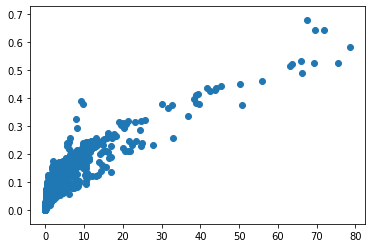

In [94]:
plt.scatter(path_df.melspectrogram,path_df.rms)

# KERAS

In [156]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Convolution2D,MaxPooling2D
from keras.optimizers import adam

In [157]:
from sklearn.preprocessing import LabelEncoder
#X = path_df['mfcc']
#X = Z
#X = X1.reshape(-1,1)
y = path_df['label']

lb = LabelEncoder()

y = np_utils.to_categorical(lb.fit_transform(y))

In [160]:
model = Sequential()

model.add(Dense(256,input_shape=(40, )))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

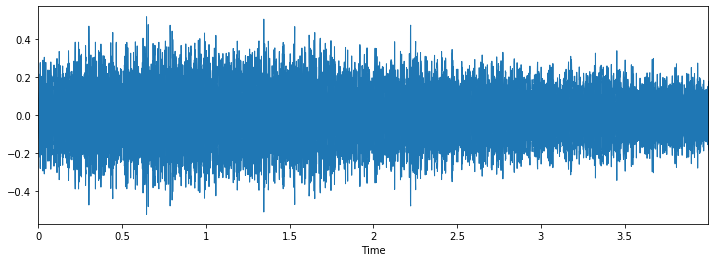

In [159]:
x, sr = librosa.load('train/Train/0.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)

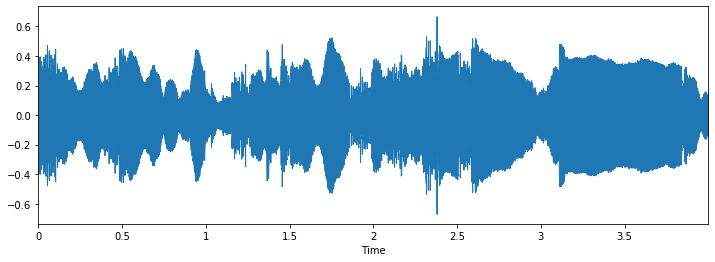

In [160]:
x, sr = librosa.load('train/Train/3.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)

In [177]:
from mlxtend.plotting import plot_learning_curves

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


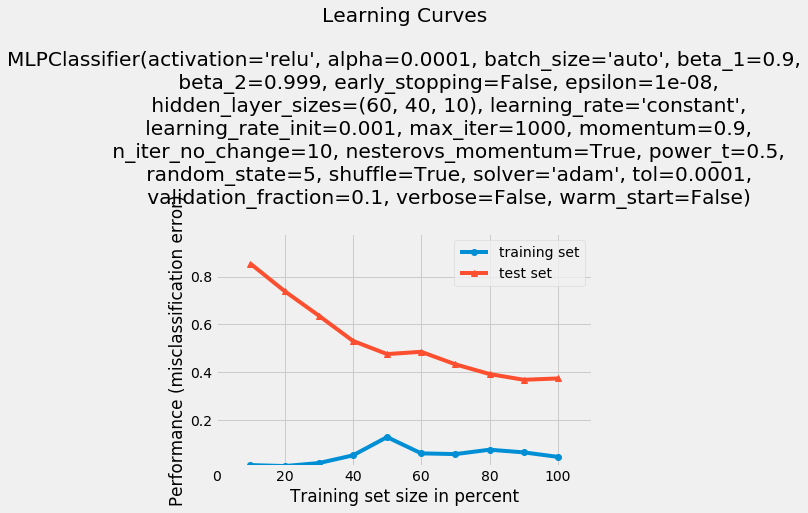

In [178]:
plot_learning_curves(x_train, y_train, x_test, y_test, clf)
plt.show()

In [3]:
X_t = np.array(path_df.mfcc.tolist())
y_t = np.array(path_df.label.tolist())
lb = LabelEncoder()

Y_t = np_utils.to_categorical(lb.fit_transform(y_t))

NameError: name 'np' is not defined

In [171]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_t,Y_t,test_size=0.33,random_state=23)

In [2]:
num_label = Y_t[1]
filter_size = 2
model = Sequential()

model.add(Dense(256,input_shape=(40, )))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

NameError: name 'Y_t' is not defined

In [1]:
model.summary()
model.fit(x_train,y_train,batch_size=32,epochs=200,validation_data=(x_test,y_test),verbose=1)

NameError: name 'model' is not defined

In [176]:
score_train = model.evaluate(x_train,y_train,verbose=0)
score_test = model.evaluate(x_test,y_test,verbose=0)
print(score_train)
print(score_test)

[0.18554951196530794, 0.9491897821426392]
[0.38348437400499447, 0.8835005760192871]


# Testing Attribute Relevance Analysis

In [300]:
feature = ['melspectrogram','rms']
#feature = path_df[column_train]
label = dataset['label']

In [312]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(5435):
        val = list(dataset[feature])[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [313]:
calculate_woe_iv(dataset,feature,label)

KeyError: "None of [Index(['siren', 'street_music', 'drilling', 'siren', 'dog_bark',\n       'children_playing', 'street_music', 'drilling', 'gun_shot', 'dog_bark',\n       ...\n       'street_music', 'engine_idling', 'dog_bark', 'street_music',\n       'children_playing', 'engine_idling', 'dog_bark', 'engine_idling',\n       'engine_idling', 'air_conditioner'],\n      dtype='object', length=5435)] are in the [columns]"

In [180]:
path_df.head()

,path,label,rms,mfcc,melspectrogram
0,train/Train/0.wav,siren,0.107979,"[-82.12359, 139.50595, -42.430847, 24.82786, -...",2.618728
1,train/Train/1.wav,street_music,0.227405,"[-15.744001, 124.11996, -29.42888, 39.44719, -...",11.364860
2,train/Train/2.wav,drilling,0.067240,"[-123.393654, 15.181944, -50.093338, 7.141871,...",0.606284
3,train/Train/3.wav,siren,0.184036,"[-213.2787, 89.323616, -55.256165, 12.632097, ...",7.957627
4,train/Train/4.wav,dog_bark,0.150679,"[-237.9265, 135.90247, 39.26844, 21.24023, 9.5...",9.616514


In [314]:
label

0                 siren
1          street_music
2              drilling
3                 siren
4              dog_bark
             ...       
5430      engine_idling
5431           dog_bark
5432      engine_idling
5433      engine_idling
5434    air_conditioner
Name: label, Length: 5435, dtype: object

,path,label,rms,mfcc,melspectrogram,zcr,sc
0,train/Train/0.wav,siren,0.107979,"[-82.12359, 139.50595, -42.430847, 24.82786, -...",2.618728,0.085286,"[[1721.7573842070665, 1756.5329224582442, 1776..."
1,train/Train/1.wav,street_music,0.227405,"[-15.744001, 124.11996, -29.42888, 39.44719, -...",11.364860,0.091678,"[[1944.4446714720325, 1754.38639470224, 1490.6..."
2,train/Train/2.wav,drilling,0.067240,"[-123.393654, 15.181944, -50.093338, 7.141871,...",0.606284,0.314608,"[[2637.5527198212058, 2363.7869031161554, 2322..."
3,train/Train/3.wav,siren,0.184036,"[-213.2787, 89.323616, -55.256165, 12.632097, ...",7.957627,0.107778,"[[2408.419503752015, 2502.4956303337826, 2464...."
4,train/Train/4.wav,dog_bark,0.150679,"[-237.9265, 135.90247, 39.26844, 21.24023, 9.5...",9.616514,0.025309,"[[1576.293899393653, 1567.6104449351628, 1879...."


In [287]:
with pd.ExcelWriter('test.xlsx') as writer:  
    path_df.to_excel(writer, sheet_name='')

In [298]:
dataset = pd.read_excel('test.xlsx',delim_whitespace=True,header=0)

In [299]:
dataset.head()

,Unnamed: 0,path,label,rms,mfcc,melspectrogram,zcr,sc
0,0,train/Train/0.wav,siren,0.107979,[-82.12359 139.50595 -42.430847 24.82...,2.618728,0.085286,[[1721.75738421 1756.53292246 1776.29732762 17...
1,1,train/Train/1.wav,street_music,0.227405,[-15.744001 124.11996 -29.42888 39.44...,11.364860,0.091678,[[1944.44467147 1754.3863947 1490.69434487 13...
2,2,train/Train/2.wav,drilling,0.067240,[-123.393654 15.181944 -50.093338 ...,0.606284,0.314608,[[2637.55271982 2363.78690312 2322.25789727 23...
3,3,train/Train/3.wav,siren,0.184036,[-2.13278702e+02 8.93236160e+01 -5.52561646e+...,7.957627,0.107778,[[2408.41950375 2502.49563033 2464.42190046 25...
4,4,train/Train/4.wav,dog_bark,0.150679,[-2.3792650e+02 1.3590247e+02 3.9268440e+01 ...,9.616514,0.025309,[[1576.29389939 1567.61044494 1879.77479853 23...


In [307]:
dataset['label']

0                 siren
1          street_music
2              drilling
3                 siren
4              dog_bark
             ...       
5430      engine_idling
5431           dog_bark
5432      engine_idling
5433      engine_idling
5434    air_conditioner
Name: label, Length: 5435, dtype: object